### Методы распознавания текста (OCR) путем предварительного преобразования CSV-файла в PNG-файл 


In [1]:
#библиотеки
import pandas as pd
import matplotlib.pyplot as mpl
import os
import pytesseract
import cv2
from PIL import Image, ImageDraw, ImageFont
import json

In [2]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\лейкоз.csv', delimiter=';')

In [3]:
df.head(20)

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Заголовок документа,Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Флаг нормы кач. показателя
0,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Лейкоциты (WBC),1.80,10*9/л,4:11,NaN,NaN,NaN,NaN
1,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Эритроциты (RBC),4.18,10*12/л,"3,8:5,7",NaN,NaN,NaN,NaN
2,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гемоглобин (HGB),120.00,г/л,117:160,NaN,NaN,NaN,NaN
3,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гематокрит (HCT),35.10,%,35:47,NaN,NaN,NaN,NaN
4,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Средний объем эритроцита (MCV),84.00,фл,80:99,NaN,NaN,NaN,NaN
5,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Среднее содержание гемоглобина в эритроците (MCH),28.70,пг,27:38,NaN,NaN,NaN,NaN
6,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Средняя концентрация гемоглобина в эритроците ...,34.20,г/дл,30:38,NaN,NaN,NaN,NaN
7,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Тромбоциты (PLT),51.00,10*9/л,150:450,NaN,NaN,NaN,NaN
8,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,"Нейтрофилы, относительное количество (NE%)",27.90,%,45:72,NaN,NaN,NaN,NaN
9,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,"Лимфоциты, относительное количество (LY%)",50.00,%,18:44,NaN,NaN,NaN,NaN


In [35]:
unique_values = df['ID истории болезни'].unique()
unique_values


array(['b0a85bb2-3404-11ed-ab56-0050568844e6',
       '2efd978b-cd3d-11ed-8604-005056880ecb',
       '76416b20-b70b-11ec-ab54-0050568844e6',
       'eb8b7ced-2860-11ed-ab56-0050568844e6',
       '16e21cb0-ea56-11ed-ab67-0050568844e6',
       '89570a49-1248-11ed-ab56-0050568844e6',
       'f52255a4-f9b6-11eb-bb97-2cea7fe73f75',
       'b36a2106-4308-11ed-ab5a-0050568844e6',
       '86475e95-6a40-11ed-ab5f-0050568844e6',
       '7ed07467-c49f-11ed-8602-005056880ecb',
       '7d6935ef-4493-11ed-ab5a-0050568844e6',
       '1c63c1e6-6b70-11eb-80ea-901b0e63368a',
       '3a624a2c-2816-11ec-bb98-2cea7fe73f75',
       '7fbff64d-f55b-11ed-8604-005056880ecb',
       'ff883bc4-80a2-11eb-bb94-2cea7fe73f75',
       'fc6638ea-e869-11eb-bb97-2cea7fe73f75',
       '6c042869-f6a6-11ec-ab56-0050568844e6',
       'cf550ceb-8d49-11eb-bb95-2cea7fe73f75',
       '9918385b-0c30-11ee-8604-005056880ecb',
       '4e40fb46-536e-11ed-ab5a-0050568844e6',
       '7ee25a9e-a480-11ed-8600-005056880ecb',
       'd13aa

In [26]:
num_unique = df['ID истории болезни'].nunique()
print(f"Количество уникальных историй болезни: {num_unique}")


Количество уникальных историй болезни: 92


In [ ]:
counts = df['ID истории болезни'].value_counts()
print('кол-во строк для каждой ИБ,', counts)



кол-во строк для каждой ИБ, ID истории болезни
aaf39b25-e684-11ee-ab6f-0050568844e6    294
d13aae4f-a605-11ed-ab61-0050568844e6    272
c1f452ff-d091-11ee-8606-005056880ecb    262
3e338049-c7de-11ed-8602-005056880ecb    255
70076ff2-f7da-11ee-ab6f-0050568844e6    208
                                       ... 
4639efe0-cd4d-11ed-ab67-0050568844e6     27
268d2f6a-32ae-11ea-80c5-901b0e633689     26
f52255a4-f9b6-11eb-bb97-2cea7fe73f75     25
cf550ceb-8d49-11eb-bb95-2cea7fe73f75     24
eb8b7ced-2860-11ed-ab56-0050568844e6     22
Name: count, Length: 92, dtype: int64


Кол-во строк на каждого пациента неодинаковое.

In [34]:
unique_diagnosis = df['Осн. диаг. при выписке МКБ10 (текст)'].unique()
unique_diagnosis

array(['Плазмоклеточный лейкоз', 'Другой уточненный лейкоз',
       'Острый лимфобластный лейкоз', 'Хронический лимфоцитарный лейкоз',
       'Волосатоклеточный лейкоз', 'Острый миелоидный лейкоз',
       'Острый миеломоноцитарный лейкоз', 'Другой миелоидный лейкоз',
       'Острый лейкоз неуточненного клеточного типа'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36217 entries, 0 to 36216
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID истории болезни                    36217 non-null  object 
 1   Осн. диаг. при выписке МКБ10 (текст)  36217 non-null  object 
 2   Заголовок документа                   36217 non-null  object 
 3   Кол. лаб. показатель                  36156 non-null  object 
 4   Значение кол. показателя              36156 non-null  float64
 5   Ед. изм. кол. показателя              36156 non-null  object 
 6   Норма кол. показателя                 36156 non-null  object 
 7   Кач. лаб. показатель                  6974 non-null   object 
 8   Значение кач. показателя              6974 non-null   object 
 9   Норма кач. показателя                 6974 non-null   object 
 10  Флаг нормы кач. показателя            6974 non-null   object 
dtypes: float64(1), 

In [22]:
with open('C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\лейкоз.csv', 'r', encoding='utf-8') as f:
    for _ in range(10):  # первые 10 строк
        print(f.readline())


ID истории болезни;Осн. диаг. при выписке МКБ10 (текст);Заголовок документа;Кол. лаб. показатель;Значение кол. показателя;Ед. изм. кол. показателя;Норма кол. показателя;Кач. лаб. показатель;Значение кач. показателя;Норма кач. показателя;Флаг нормы кач. показателя

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Лейкоциты (WBC);1.8;10*9/л;4:11;;;;

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Эритроциты (RBC);4.18;10*12/л;3,8:5,7;;;;

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Гемоглобин (HGB);120;г/л;117:160;;;;

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Гематокрит (HCT);35.1;%;35:47;;;;

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Средний объем эритроцита (MCV);84;фл;80:99;;;;

2e1d0b3f-488a-11ed-ab5a-0050568844e6;Плазмоклеточный лейкоз;Общий анализ крови;Среднее содержание гемоглобина в эритроците (MCH);28.7;пг;27

### Преобразование CSV в PNG с раширением размера ячеек для улучшения распознавания.

In [5]:
def csv_to_png(csv_file, output_dir, chunk_size=10):
    # Проверяем, существует ли директория, и создаём её, если нет
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Чтение CSV
    df = pd.read_csv(csv_file, delimiter=';')

    # Разделение на части
    for i in range(0, len(df), chunk_size):
        chunk = df.iloc[i:i + chunk_size]
        # Увеличение ширины для альбомной ориентации
        fig, ax = mpl.subplots(figsize=(20, len(chunk) * 0.8))  
        ax.axis('tight')
        ax.axis('off')

        # Создание таблицы
        table = mpl.table(
            cellText=chunk.values,
            colLabels=chunk.columns,
            cellLoc='center',
            loc='center',
        )
        
        # Увеличение шрифта
        table.auto_set_font_size(False)
        table.set_fontsize(13) 
        
        try:  # Подгонка размеров ячеек
            table.auto_set_column_width(col=list(range(len(chunk.columns))))
            for key, cell in table.get_celld().items():
                cell.set_height(0.3)  # Увеличение высоты каждой ячейки (лучше распознал текст при расширенных границах, поэтому добавила)
        except AttributeError:
            pass  

        output_path = os.path.join(output_dir, f'output_{i // chunk_size + 1}.png')
        mpl.savefig(output_path, dpi=300, bbox_inches='tight', orientation='landscape') 
        mpl.close()



In [ ]:
csv_to_png(
    'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\лейкоз.csv',
    'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\output_dir',
)

Излечение координат слов в пространстве.

In [6]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

def process_image_directory(output_dir, text_dir):
    """
    Извлечение текста с сохранением координат слов.
    """
    os.makedirs(text_dir, exist_ok=True)

    for file_name in os.listdir(output_dir):
        if file_name.endswith('.png'):  # Работаем только с PNG
            image_path = os.path.join(output_dir, file_name)
            
            # Загружаем изображение
            image = Image.open(image_path)

            # Используем image_to_data для получения данных о словах с координатами
            data = pytesseract.image_to_data(
                image,
                lang='rus+eng',
                config='--psm 11',  # Используеюрежим PSM 11 (psm 6 у меня не распознавал слова() )
                output_type=pytesseract.Output.DICT
            )

            # Структура для хранения текста и его координат
            words_with_coordinates = []

            for i in range(len(data['text'])):
                text = data['text'][i]
                conf = int(data['conf'][i])
                x, y = int(data['left'][i]), int(data['top'][i])
                width = int(data['width'][i])
                height = int(data['height'][i])

                # Пропускаем пустые или плохо распознанные слова
                if conf <= 0 or not text.strip():
                    continue

                # Сохраняем текст и его координаты
                words_with_coordinates.append({
                    'text': text,
                    'x': x,
                    'y': y,
                    'width': width,
                    'height': height
                })

            # Сохранение в файлJSON
            output_path = os.path.join(text_dir, f"{os.path.splitext(file_name)[0]}_words.json")
            with open(output_path, 'w', encoding='utf-8') as output_file:
                import json
                json.dump(words_with_coordinates, output_file, ensure_ascii=False, indent=4)



In [ ]:
output_dir = 'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\output_dir'
text_dir = 'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\text_dir'
process_image_directory(output_dir, text_dir)


In [ ]:
# пример полученного файла
json_file_path = 'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\text_dir\\output_1_words.json'
# Чтение JSON файла
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Преобразование в DataFrame
df = pd.DataFrame(data)

# Показ первых нескольких строк
print(df.head())


         text     x    y  width  height
0        Кол.  4193  283    113      40
1        лаб.  4331  281    110      42
2  показатель  4469  293    320      30
3    Значение  5577  283    265      40
4        кол.  5867  293    107      30


Проверка координат

In [ ]:
# Загружаемиз JSON
json_file_path = 'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\text_dir\\output_1_words.json'
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Загрузка исходного изображения
image_path = 'C:\\Users\\admin\\Desktop\\DS\\git\\mipt\\hakaton_3 sem\\output_dir\\output_1.png'
image = Image.open(image_path)

# Создание объекта на изображении
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Наложение текста с координатами (x, y)
for word_info in data:
    text = word_info['text']
    x, y = word_info['x'], word_info['y']
    
    # Рисуем прямоугольник, чтобы увидеть границы каждого слова
    draw.rectangle([x, y, x + word_info['width'], y + word_info['height']], outline="red", width=2)
    
    # Рисуем текст
    draw.text((x, y), text, fill="black", font=font)

# демонстрация
image.show()
image.save('output_with_text_overlay.png')


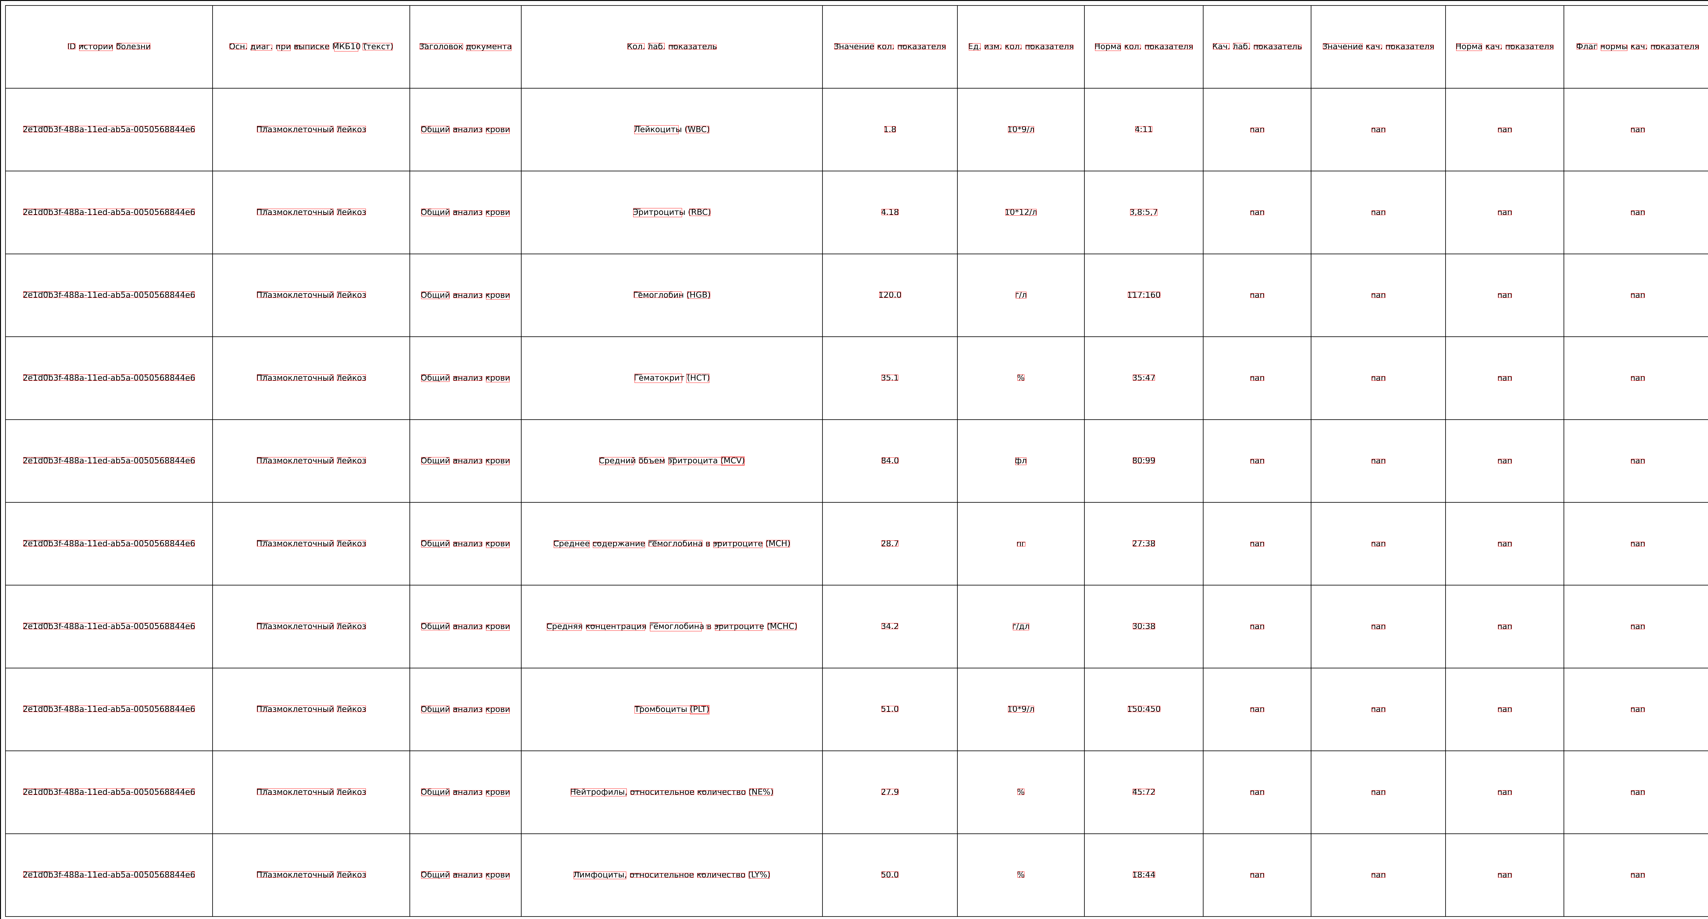

Слова хорошо распознались и правильно наложились на оригинальный png-файл